In [1]:
import pandas as pd
import zipfile

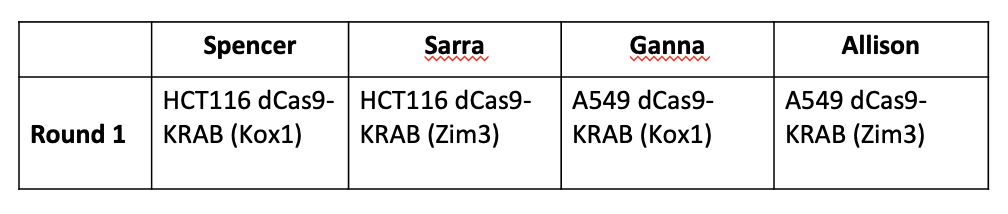

In [3]:

path_out = 'Data/PrimaryLibrary/processed_z_score/'
annot_guide_lfcs_A549_Kox1 = pd.read_csv(zipfile.ZipFile('../Data.zip','r').open(path_out + 'A549_Kox1_zscore.csv'))
annot_guide_lfcs_A549_Zim3 = pd.read_csv(zipfile.ZipFile('../Data.zip','r').open(path_out + 'A549_Zim3_zscore.csv'))
annot_guide_lfcs_HCT116_Kox1 = pd.read_csv(zipfile.ZipFile('../Data.zip','r').open(path_out + 'HCT116_Kox1_zscore.csv'))
annot_guide_lfcs_HCT116_Zim3 = pd.read_csv(zipfile.ZipFile('../Data.zip','r').open(path_out + 'HCT116_Zim3_zscore.csv'))


In [4]:
annot_guide_lfcs_HCT116_Kox1.rename(columns = {'avg_lfc':'avg_lfc_HCT116_Kox1',
                                              'z_scored_avg_lfc': 'z_scored_avg_lfc_HCT116_Kox1'}, inplace = True)

In [5]:
annot_guide_lfcs_HCT116_Zim3.rename(columns = {'avg_lfc':'avg_lfc_HCT116_Zim3',
                                              'z_scored_avg_lfc': 'z_scored_avg_lfc_HCT116_Zim3'}, inplace = True)

In [6]:
annot_guide_lfcs_A549_Kox1.rename(columns = {'avg_lfc':'avg_lfc_A549_Kox1',
                                              'z_scored_avg_lfc': 'z_scored_avg_lfc_A549_Kox1'}, inplace = True)

In [7]:
annot_guide_lfcs_A549_Zim3.rename(columns = {'avg_lfc':'avg_lfc_A549_Zim3',
                                              'z_scored_avg_lfc': 'z_scored_avg_lfc_A549_Zim3'}, inplace = True)

In [8]:
# merge file thats only screened in A549 and select columns
A549_files = pd.merge(annot_guide_lfcs_A549_Zim3, annot_guide_lfcs_A549_Kox1)
A549_files= A549_files[['Target Gene Symbol','Category','TSS Position',
            'sgRNA Sequence','sgRNA Context Sequence','On-Target Efficacy Score','sgRNA \'Cut\' Site TSS Offset','TSS Bucket',
            'avg_lfc_A549_Zim3','z_scored_avg_lfc_A549_Zim3','avg_lfc_A549_Kox1','z_scored_avg_lfc_A549_Kox1']]


In [9]:
# merge file thats only screened in HCT116 and select columns

HCT116_files = pd.merge(annot_guide_lfcs_HCT116_Zim3, annot_guide_lfcs_HCT116_Kox1)
HCT116_files = HCT116_files[['Target Gene Symbol','Category','TSS Position',
            'sgRNA Sequence','sgRNA Context Sequence','On-Target Efficacy Score','sgRNA \'Cut\' Site TSS Offset','TSS Bucket',
            'avg_lfc_HCT116_Zim3','z_scored_avg_lfc_HCT116_Zim3','avg_lfc_HCT116_Kox1','z_scored_avg_lfc_HCT116_Kox1']]


In [10]:
# merge A549 and HCT116 together
merged_df = pd.merge(A549_files , 
                     HCT116_files, 
                      how = 'inner')

In [11]:
# rows in combined file
len(merged_df)

106852

In [12]:
# check if sgRNA Context Sequence is unique
merged_df['sgRNA Context Sequence'].value_counts()

sgRNA Context Sequence
CTAGAAAAAAAAAAGGTCATTCAGGGGTCC    1
GGAGGGCACAGGCTGTGTAAGGGATGGTGG    1
GTCAGGCACCAAAGTGGATGAATATGGAGC    1
CCGGGGCACCAAAGCCAATGGGAAGGGCCG    1
GCATGGCACCAAAGCAGGGGTGGTGGGCCA    1
                                 ..
ATGACCGAGGGGGGTTAGGCTCCAGGGCTT    1
GAGGCCGAGGGGGCGCAACCTGAGGGGCGG    1
AGCCCCGAGGGGCGCGGAGAGGGAGGGAGC    1
AGCTCCGAGGGCTGACAGGTCCAAGGGGGC    1
CAGATTTGTTTGTAATGCAATGAGAGGCTT    1
Name: count, Length: 104869, dtype: int64

In [13]:
merged_df['Category'].value_counts()

Category
Essential              59553
Non-essential          45316
ONE_INTERGENICO_CTL     1983
Name: count, dtype: int64

In [14]:
merged_df.head()

,Target Gene Symbol,Category,TSS Position,sgRNA Sequence,sgRNA Context Sequence,On-Target Efficacy Score,sgRNA 'Cut' Site TSS Offset,TSS Bucket,avg_lfc_A549_Zim3,z_scored_avg_lfc_A549_Zim3,avg_lfc_A549_Kox1,z_scored_avg_lfc_A549_Kox1,avg_lfc_HCT116_Zim3,z_scored_avg_lfc_HCT116_Zim3,avg_lfc_HCT116_Kox1,z_scored_avg_lfc_HCT116_Kox1
0,OR6K6,Non-essential,158754721.0,AAAAAAAAAAGGTCATTCAG,CTAGAAAAAAAAAAGGTCATTCAGGGGTCC,-0.153200,-24.0,"[-50, 0)",0.216872,0.023685,-0.110835,-0.744721,-0.265074,-1.285187,-0.272546,-1.421982
1,COPS3,Essential,17281246.0,AAAAAAAAAGCCGTGTGAGC,AAAAAAAAAAAAAGCCGTGTGAGCTGGCGG,-0.235500,825.0,"[500, 1000)",-0.268908,-1.270512,0.121195,-0.181286,-0.221117,-1.178776,-0.085464,-0.929032
2,RSRC2,Essential,122526936.0,AAAAAAAAAGGCACTCCCTG,CTGGAAAAAAAAAGGCACTCCCTGCGGCTC,-0.009779,288.0,"[200, 300)",-0.024939,-0.620540,0.690920,1.202169,-0.094539,-0.872359,0.115417,-0.399721
3,ADSL,Essential,40346501.0,AAAAAAAAAGGCCTGCCTTT,AAAAAAAAAAAAAGGCCTGCCTTTCGGGTT,-0.813600,-391.0,"[-400, -300)",-0.105666,-0.835607,0.616970,1.022597,0.070252,-0.473439,0.565959,0.787431
4,CYP7A1,Non-essential,58500163.0,AAAAAAAAAGTGGTAGTAAC,TAGAAAAAAAAAAGTGGTAGTAACTGGCCT,-0.235500,-121.0,"[-200, -100)",-0.292964,-1.334599,-0.183103,-0.920208,-0.069267,-0.811182,0.119249,-0.389626


In [14]:
out_path = "../Data/PrimaryLibrary/processed_z_score/"
merged_df.to_csv(out_path + "inHouseDatasetsCombined.csv",
                index = False)